In [30]:
from feature_selector import FeatureSelector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [31]:
data_clinical = pd.read_csv('../data/ANMerge_clinical_under_90.csv')

In [32]:
data = pd.read_csv('../data/Metabolic_data_0.csv')

# columns_to_drop = [	'Visit',	'Month']
# mri_data.drop(columns_to_drop, axis=1, inplace=True)

In [33]:
cols = list(data.columns)
cols.append('Diagnosis')

In [34]:
data = pd.merge(data, data_clinical, left_on='Sample ID', right_on='Unnamed: 0', how='inner')[cols]
data['Diagnosis'] = data['Diagnosis'].replace({'AD':0, 'CTL':1, 'MCI':2})  

In [35]:
train = data.copy()
train_labels = train['Diagnosis']
train = train.drop(columns = ['Diagnosis','Sample ID'])


In [36]:
## convert categorical columns type to cat
# categorical_cols = ['Visit', 'Site', 'Sex', 'APOE' ]
# train[categorical_cols] = train[categorical_cols].astype('category')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Columns: 2802 entries, 2.68_380.3754m/z to 0.69_228.2312m/z
dtypes: float64(2802)
memory usage: 11.8 MB


In [38]:
fs = FeatureSelector(data = train, labels = train_labels)

### Remove Single Unique Features

In [39]:
fs.identify_single_unique()

0 features with a single unique value.



In [40]:
fs.ops['single_unique']

[]

### Remove Multi-colinear Features

In [41]:
fs.identify_collinear(correlation_threshold=0.975)

1230 features with a correlation magnitude greater than 0.97.



In [42]:
correlated_features = fs.ops['collinear']
correlated_features[:10]

['2.70_952.4979m/z',
 '2.65_893.4753m/z',
 '2.65_262.1022m/z',
 '2.65_990.0082m/z',
 '2.65_893.9761m/z',
 '2.65_990.5085m/z',
 '2.65_705.9891m/z',
 '2.66_443.7910m/z',
 '2.66_415.1684m/z',
 '2.66_422.7779n']

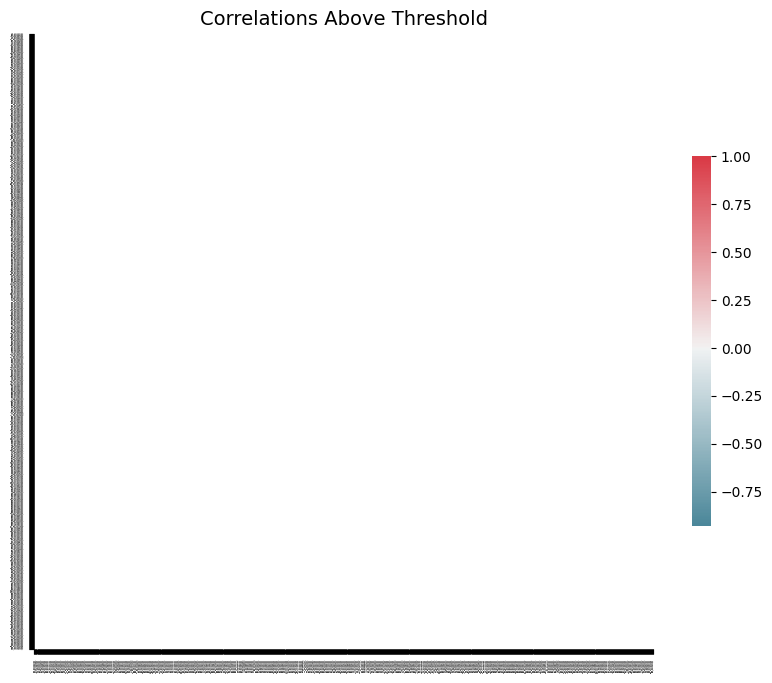

In [43]:
fs.plot_collinear()

In [44]:
fs.record_collinear

drop_feature      corr_feature  corr_value
0      2.70_952.4979m/z  2.70_952.9981m/z    0.997980
1      2.65_893.4753m/z  2.70_952.9981m/z    0.993246
2      2.65_893.4753m/z  2.70_952.4979m/z    0.994474
3      2.65_262.1022m/z  2.65_234.0710m/z    0.994654
4      2.65_990.0082m/z  2.70_952.9981m/z    0.989222
...                 ...               ...         ...
21880    1.01_557.3943n  0.81_398.3102m/z    0.975451
21881    1.01_557.3943n  0.90_442.3362m/z    0.987319
21882    1.01_557.3943n  1.56_478.3466m/z    0.982874
21883    1.01_557.3943n  0.91_500.3791m/z    0.993515
21884    1.01_557.3943n  1.00_544.4057m/z    0.985267

[21885 rows x 3 columns]

### Zero Important Features

In [45]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'accuracy', n_iterations = 10)

Training Gradient Boosting Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477019
[LightGBM] [Info] Number of data points in the train set: 554, number of used features: 2801
[LightGBM] [Info] Start training from score -1.187266
[LightGBM] [Info] Start training from score -1.187266
[LightGBM] [Info] Start training from score -0.941886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [46]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 2802 original features
There are 0 one-hot features


In [47]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[:5]

['2.01_628.3549m/z',
 '2.37_646.0319m/z',
 '2.42_849.9498m/z',
 '3.36_989.0449m/z',
 '2.40_1079.0232m/z']

In [48]:
#drop the zero importance features
train_no_collinear_no_zero_importance = fs.remove(methods = ['zero_importance', 'collinear'])

Removed 1341 features.


In [49]:
train_no_collinear_no_zero_importance

2.68_380.3754m/z  2.69_915.9888m/z  2.67_379.2146n  2.70_952.9981m/z  \
0                 0.0          0.141887        0.155377          0.475351   
1                 0.0          0.841281        0.182323          0.644411   
2                 0.0          0.011674        0.118177          0.454199   
3                 0.0          0.000243        0.000055          0.000068   
4                 0.0          0.000803        0.000054          0.000000   
..                ...               ...             ...               ...   
549               0.0          0.045069        0.186790          0.631848   
550               0.0          0.358595        0.142111          0.201618   
551               0.0          0.572313        0.239171          0.585132   
552               0.0          0.000899        0.000230          0.000000   
553               0.0          0.000000        0.097516          0.361483   

     2.70_1049.5313m/z  2.69_325.2245n  2.70_263.1581m/z  2.70_250.1790m/z  \
0             0.320422        0.001610          0.000283          0.000481   
1             0.520985        0.002147          0.000354          0.000677   
2             0.295365        0.001754          0.000376          0.000548   
3             0.000000        0.001085          0.000369          0.000527   
4             0.000000        0.000528          0.000271          0.000555   
..                 ...             ...               ...               ...   
549           0.497847        0.002168          0.000374          0.000616   
550           0.152147        0.004783          0.000211          0.000369   
551           0.492399        0.001642          0.000296          0.000387   
552           0.000000        0.000516          0.000137          0.000352   
553           0.256761        0.001339          0.000252          0.000513   

     2.65_561.8540m/z  2.65_280.1997n  ...  4.13_137.0701m/z  \
0            0.163862        0.024318  ...          0.048848   
1            0.192817        0.025249  ...          0.034053   
2            0.281775        0.030040  ...          0.000000   
3            0.000000        0.000126  ...          0.055530   
4            0.000000        0.000041  ...          0.060917   
..                ...             ...  ...               ...   
549          0.190412        0.026786  ...          0.045324   
550          0.056189        0.016298  ...          0.040568   
551          0.130409        0.025680  ...          0.045293   
552          0.000000        0.000384  ...          0.057195   
553          0.178834        0.027432  ...          0.016154   

     0.83_213.1557m/z  1.02_168.0485m/z  0.65_188.1075n  0.65_334.1403m/z  \
0            0.343243          0.083113        0.027700          0.025333   
1            0.225594          0.035301        0.066573          0.096711   
2            0.164270          0.039157        0.028047          0.023422   
3            0.091392          0.022411        0.024157          0.040493   
4            0.172303          0.055230        0.038927          0.170218   
..                ...               ...             ...               ...   
549          0.349537          0.132857        0.023839          0.021190   
550          0.248655          0.266778        0.025979          0.023252   
551          0.373855          0.092642        0.033783          0.047340   
552          0.211144          0.037153        0.052417          0.104773   
553          0.183903          0.165453        0.079660          0.032444   

     0.87_197.1651m/z  0.62_431.1429m/z  1.02_111.0548m/z  0.64_439.2432m/z  \
0            0.117418          0.033534          0.527260          0.016686   
1            0.054526          0.037839          0.134347          0.024781   
2            0.048747          0.015370          0.182499          0.018988   
3            0.036124          0.015749          0.115501          0.019358   
4            0.047522          0.027212          0.271

### Feature Importance

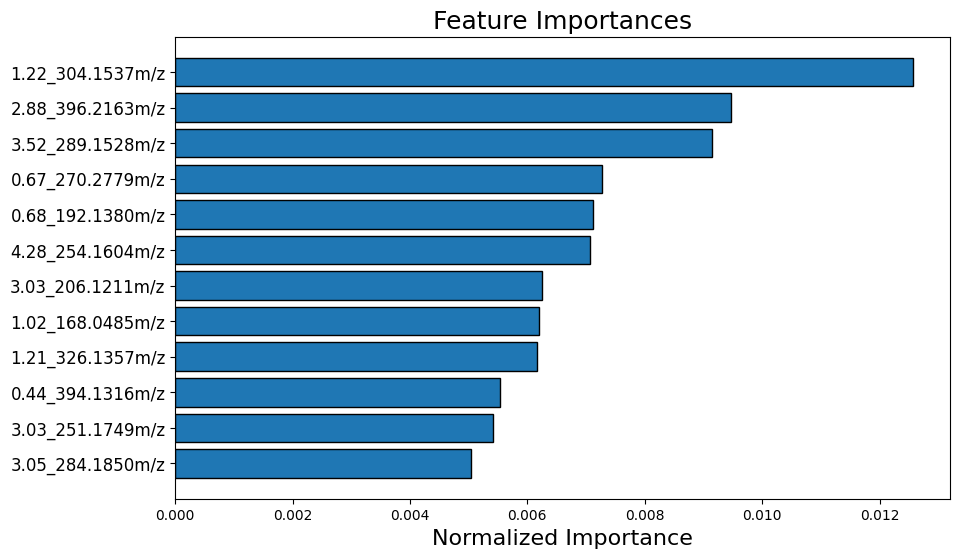

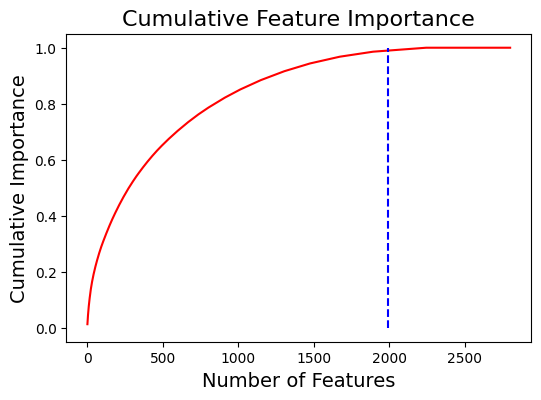

1996 features required for 0.99 of cumulative importance


In [50]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [51]:
fs.feature_importances.head(10)

feature  importance  normalized_importance  cumulative_importance
0  1.22_304.1537m/z       304.0               0.012572               0.012572
1  2.88_396.2163m/z       229.0               0.009470               0.022042
2  3.52_289.1528m/z       221.0               0.009139               0.031182
3  0.67_270.2779m/z       176.0               0.007278               0.038460
4  0.68_192.1380m/z       172.0               0.007113               0.045573
5  4.28_254.1604m/z       171.0               0.007072               0.052645
6  3.03_206.1211m/z       151.0               0.006245               0.058889
7  1.02_168.0485m/z       150.0               0.006203               0.065092
8  1.21_326.1357m/z       149.0               0.006162               0.071254
9  0.44_394.1316m/z       134.0               0.005542               0.076796

In [52]:
fs.identify_low_importance(cumulative_importance = 0.99)

1995 features required for cumulative importance of 0.99 after one hot encoding.
807 features do not contribute to cumulative importance of 0.99.



In [53]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['1.20_592.3080m/z',
 '1.16_994.7254m/z',
 '1.64_946.5031m/z',
 '2.02_624.4410m/z',
 '1.64_548.3470m/z']

In [54]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1425 features including one-hot features.


In [58]:
data

Sample ID  2.68_380.3754m/z  2.69_915.9888m/z  2.69_388.9683m/z  \
0    LDZADC003_1               0.0          0.141887               0.0   
1    LNDCTL019_1               0.0          0.841281               0.0   
2    THSADC057_1               0.0          0.011674               0.0   
3    PRGMCI017_1               0.0          0.000243               0.0   
4    KPOMCI041_1               0.0          0.000803               0.0   
..           ...               ...               ...               ...   
549   DCR00254_1               0.0          0.045069               0.0   
550  LNDCTL062_1               0.0          0.358595               0.0   
551  LNDCTL040_1               0.0          0.572313               0.0   
552  PRGMCI008_1               0.0          0.000899               0.0   
553  THSADC059_1               0.0          0.000000               0.0   

     2.67_379.2146n  2.68_797.9443m/z  2.70_952.9981m/z  2.70_952.4979m/z  \
0          0.155377          0.454463          0.475351          0.456749   
1          0.182323          0.552260          0.644411          0.656330   
2          0.118177          0.359054          0.454199          0.465937   
3          0.000055          0.000000          0.000068          0.000037   
4          0.000054          0.000071          0.000000          0.000061   
..              ...               ...               ...               ...   
549        0.186790          0.566045          0.631848          0.637275   
550        0.142111          0.416654          0.201618          0.208187   
551        0.239171          0.702180          0.585132          0.572339   
552        0.000230          0.000369          0.000000          0.000007   
553        0.097516          0.286063          0.361483          0.370526   

     2.70_1049.5313m/z  2.70_1049.0311m/z  ...  0.83_213.1557m/z  \
0             0.320422           0.239900  ...          0.343243   
1             0.520985           0.349077  ...          0.225594   
2             0.295365           0.198258  ...          0.164270   
3             0.000000           0.000000  ...          0.091392   
4             0.000000           0.000000  ...          0.172303   
..                 ...                ...  ...               ...   
549           0.497847           0.318255  ...          0.349537   
550           0.152147           0.227916  ...          0.248655   
551           0.492399           0.601732  ...          0.373855   
552           0.000000           0.000000  ...          0.211144   
553           0.256761           0.174619  ...          0.183903   

     1.02_168.0485m/z  0.65_188.1075n  0.65_334.1403m/z  0.87_197.1651m/z  \
0            0.083113        0.027700          0.025333          0.117418   
1            0.035301        0.066573          0.096711          0.054526   
2            0.039157        0.028047          0.023422          0.048747   
3            0.022411        0.024157          0.040493          0.036124   
4            0.055230        0.038927          0.170218          0.047522   
..                ...             ...               ...               ...   
549          0.132857        0.023839          0.021190          0.112931   
550          0.266778        0.025979          0.023252          0.049733   
551          0.092642        0.033783          0.047340          0.158575   
552          0.037153        0.052417          0.104773          0.053503   
553          0.165453        0.079660          0.032444          0.113144   

     0.62_431.1429m/z  1.02_111.0548m/z  0.64_439.2432m/z  0.69_228.2312m/z  \
0            0.033534          0.527260          0.016686          0.069577   
1            0.037839          0.134347          0.024781          0.058054   
2            0.015370          0.182499          0.018988          0.077321   
3            0.015749          0.115501          0.019358          0.063863   
4            0.027212          0.271051          0.02780

In [59]:
train_removed_all['Sample ID'] = data['Sample ID']
train_removed_all['Diagnosis'] = train_labels

In [60]:
train_removed_all.to_csv('../data/Metabolic_data_2.csv', index = False)

In [61]:
train_removed_all

2.68_380.3754m/z  2.69_915.9888m/z  2.67_379.2146n  2.70_952.9981m/z  \
0                 0.0          0.141887        0.155377          0.475351   
1                 0.0          0.841281        0.182323          0.644411   
2                 0.0          0.011674        0.118177          0.454199   
3                 0.0          0.000243        0.000055          0.000068   
4                 0.0          0.000803        0.000054          0.000000   
..                ...               ...             ...               ...   
549               0.0          0.045069        0.186790          0.631848   
550               0.0          0.358595        0.142111          0.201618   
551               0.0          0.572313        0.239171          0.585132   
552               0.0          0.000899        0.000230          0.000000   
553               0.0          0.000000        0.097516          0.361483   

     2.70_1049.5313m/z  2.69_325.2245n  2.70_263.1581m/z  2.70_250.1790m/z  \
0             0.320422        0.001610          0.000283          0.000481   
1             0.520985        0.002147          0.000354          0.000677   
2             0.295365        0.001754          0.000376          0.000548   
3             0.000000        0.001085          0.000369          0.000527   
4             0.000000        0.000528          0.000271          0.000555   
..                 ...             ...               ...               ...   
549           0.497847        0.002168          0.000374          0.000616   
550           0.152147        0.004783          0.000211          0.000369   
551           0.492399        0.001642          0.000296          0.000387   
552           0.000000        0.000516          0.000137          0.000352   
553           0.256761        0.001339          0.000252          0.000513   

     2.65_561.8540m/z  2.65_280.1997n  ...  1.02_168.0485m/z  0.65_188.1075n  \
0            0.163862        0.024318  ...          0.083113        0.027700   
1            0.192817        0.025249  ...          0.035301        0.066573   
2            0.281775        0.030040  ...          0.039157        0.028047   
3            0.000000        0.000126  ...          0.022411        0.024157   
4            0.000000        0.000041  ...          0.055230        0.038927   
..                ...             ...  ...               ...             ...   
549          0.190412        0.026786  ...          0.132857        0.023839   
550          0.056189        0.016298  ...          0.266778        0.025979   
551          0.130409        0.025680  ...          0.092642        0.033783   
552          0.000000        0.000384  ...          0.037153        0.052417   
553          0.178834        0.027432  ...          0.165453        0.079660   

     0.65_334.1403m/z  0.87_197.1651m/z  0.62_431.1429m/z  1.02_111.0548m/z  \
0            0.025333          0.117418          0.033534          0.527260   
1            0.096711          0.054526          0.037839          0.134347   
2            0.023422          0.048747          0.015370          0.182499   
3            0.040493          0.036124          0.015749          0.115501   
4            0.170218          0.047522          0.027212          0.271051   
..                ...               ...               ...               ...   
549          0.021190          0.112931          0.023249          0.583476   
550          0.023252          0.049733          0.016472          0.466676   
551          0.047340          0.158575          0.055665          0.284345   
552          0.104773          0.053503          0.011730          0.304417   
553          0.032444          0.113144          0.132525          0.502030   

     0.64_439.2432m/z  0.69_228.2312m/z    Sample ID  Diagnosis  
0            0.016686          0.069577  LDZADC003_1          0  
1            0.024781          0.058054  LNDCTL019_1          1  
2            0.018988          0.07